# Clustering using kmodes.kprototypes 

Kmodes.kprototypes is an unsuperwised learning technique which can be used for mixed data( numerical and categorical). For Numerical data, it behaves like the normal KMeans Clustering Algorithm but for categorical features, it uses the mode values to cluster the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kprototypes import KPrototypes

In [2]:
data = pd.read_csv('Project6_data.csv')
data.head()

,Unnamed: 0,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [3]:
data.shape

(30785, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        30785 non-null  int64  
 1   Operator                          30785 non-null  object 
 2   In Out Travelling                 30785 non-null  object 
 3   Network Type                      30785 non-null  object 
 4   Rating                            30785 non-null  int64  
 5   Call Drop Category                30785 non-null  object 
 6   Latitude                          30785 non-null  float64
 7   Longitude                         30785 non-null  float64
 8   State Name                        30785 non-null  object 
 9   Average Data Speed Download       30785 non-null  float64
 10  Average Signal Strength Download  30785 non-null  float64
 11  Average Data Speed Upload         30785 non-null  float64
 12  Aver

In [5]:
data.describe()

,Unnamed: 0,Rating,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
count,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,3.078500e+04,30785.000000,30785.000000,30785.000000
mean,15392.000000,3.527075,20.986716,77.624482,13383.178796,-91.940324,3937.800252,-87.654863,9.340490e+07,74.513815,1222.318883,221781.967549
std,8887.008355,1.480751,4.904788,4.897669,9652.418551,189.709705,2022.009990,7.696626,4.112688e+07,12.449141,463.221742,93044.821822
min,0.000000,1.000000,8.255166,69.017391,0.000000,-8407.000000,220.940000,-103.200000,2.535146e+07,10.980000,143.000000,38863.000000
25%,7696.000000,2.000000,18.547627,73.739626,5191.980000,-92.580000,2680.020000,-93.000000,6.113070e+07,70.600000,998.000000,130060.000000
50%,15392.000000,4.000000,20.303444,76.945477,10804.560000,-86.800000,4130.460000,-86.920000,9.127612e+07,76.680000,1248.000000,243286.000000
75%,23088.000000,5.000000,25.263877,80.197102,20707.870000,-84.740000,5107.230000,-84.949000,1.123743e+08,82.340000,1455.500000,307713.000000
max,30784.000000,5.000000,32.427797,95.619158,32444.069600,-63.000000,12220.910000,76.930000,1.998123e+08,94.000000,3055.000000,342239.000000


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Data Cleaning 

In [7]:
# This is a 3G network type but the avg data upload speed is maximum and it is only a single entry > 98 precentile threshold.

max_thres = data['Average Data Speed Upload'].quantile(0.98)
index = data[data['Average Data Speed Upload'] > max_thres ].index
data.drop(index , axis = 0, inplace = True)
data.shape

(30784, 16)

In [8]:
max_thres = data['Average Signal Strength Upload'].quantile(0.999)
index1 = data[data['Average Signal Strength Upload'] > max_thres ].index
data.drop(index1, axis = 0, inplace = True)
data.shape

(30754, 16)

In [9]:
index2 = data[data['Rainfall'] > data['Rainfall'].quantile(0.95)].index
data.drop(index2, axis = 0, inplace = True)
data.shape

(30597, 16)

In [10]:
data = data.reset_index()

In [11]:
data1 = data
data.tail()

,index,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
30592,30780,RJio,Indoor,4G,5,Satisfactory,20.342392,85.822995,Odisha,31502.05,-72.990,6895.45,-73.030,45989707.0,73.45,1489.0,155707.0
30593,30781,RJio,Indoor,4G,5,Satisfactory,20.342392,85.822995,Odisha,31502.05,-72.990,6895.45,-73.030,45989707.0,73.45,1489.0,155707.0
30594,30782,Idea,Travelling,3G,5,Satisfactory,12.986593,77.581266,Karnataka,905.00,-101.000,561.00,-101.000,61130704.0,75.36,1248.0,191791.0
30595,30783,Vodafone,Indoor,4G,1,Poor Voice Quality,18.637340,73.768159,Maharashtra,5191.98,-96.882,2981.59,-96.550,112374333.0,82.34,1455.5,307713.0
30596,30784,Airtel,Indoor,4G,5,Satisfactory,10.813862,78.640406,Tamil Nadu,7914.68,-95.011,2788.90,-95.093,72147030.0,80.33,998.0,130060.0


<AxesSubplot:>

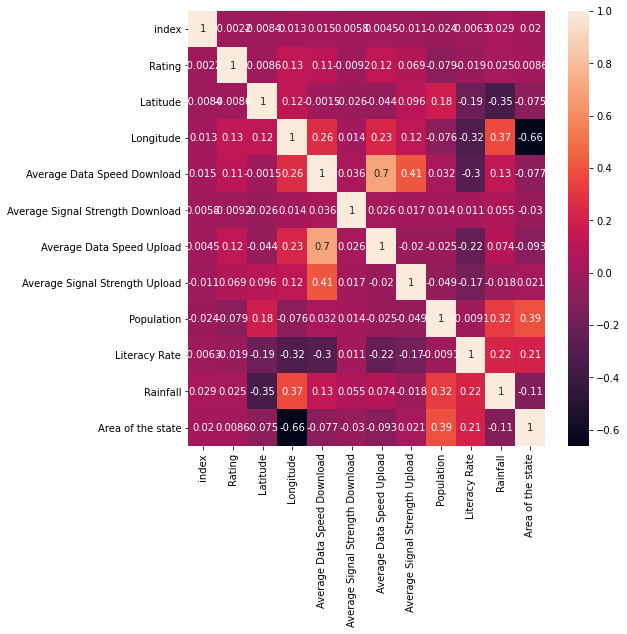

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data1.corr(), annot = True)

In [13]:
df_initial = data
data.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
data.head()

,index,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [14]:
data.columns

Index(['index', 'Operator', 'In Out Travelling', 'Network Type', 'Rating',
       'Call Drop Category', 'State Name', 'Average Data Speed Download',
       'Average Signal Strength Download', 'Average Data Speed Upload',
       'Average Signal Strength Upload', 'Population', 'Literacy Rate',
       'Rainfall', 'Area of the state'],
      dtype='object')

### Normalization (Min Max Scaler) for the Kprototypes Clustering 

In [15]:
data_numeric = data[['Average Data Speed Download',
       'Average Signal Strength Download', 'Average Data Speed Upload',
       'Average Signal Strength Upload', 'Population', 'Literacy Rate',
       'Rainfall', 'Area of the state']]

data_categoric = data[['Operator', 'In Out Travelling', 'Network Type', 'Rating',
       'Call Drop Category', 'State Name']]

In [16]:
## Scaling the numeric data

from sklearn.preprocessing import MinMaxScaler

mmc = MinMaxScaler()
data_numeric_array = mmc.fit_transform(data_numeric)

In [17]:
data_num = pd.DataFrame(data_numeric_array, columns=data_numeric.columns)
data_num

,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0.271480,0.996182,0.249495,0.207960,0.205085,0.902186,0.567831,0.495187
1,0.211519,0.996529,0.468491,0.280597,0.201124,0.939602,0.359455,0.509390
2,0.036321,0.997360,0.078701,0.441045,0.268230,0.971833,0.439363,0.288054
3,0.175517,0.996837,0.241522,0.340423,0.201124,0.939602,0.359455,0.509390
4,0.333021,0.996279,0.499733,0.226119,0.498810,1.000000,0.674460,0.884151
...,...,...,...,...,...,...,...,...
30592,0.970965,0.998803,0.702599,0.750498,0.118297,0.875420,0.691675,0.374110
30593,0.970965,0.998803,0.702599,0.750498,0.118297,0.875420,0.691675,0.374110
30594,0.027894,0.995446,0.035797,0.054726,0.205085,0.902186,0.567831,0.495187
30595,0.160029,0.995939,0.290603,0.165423,0.498810,1.000000,0.674460,0.884151


In [18]:
df = pd.concat([data_categoric, data_num], axis=1)
df.tail(190)

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
30407,RJio,Indoor,4G,1,Call Dropped,Rajasthan,0.856393,0.997839,0.580567,0.549154,0.230407,0.772422,0.000000,1.000000
30408,Idea,Travelling,4G,3,Satisfactory,Andhra Pradesh,0.136005,0.996415,0.289875,0.251769,0.339499,0.000000,0.566290,0.389203
30409,Idea,Indoor,4G,2,Call Dropped,Andhra Pradesh,0.136005,0.996415,0.289875,0.251769,0.339499,0.000000,0.566290,0.389203
30410,Airtel,Indoor,4G,5,Satisfactory,Karnataka,0.271480,0.996182,0.249495,0.207960,0.205085,0.902186,0.567831,0.495187
30411,Airtel,Indoor,4G,1,Poor Voice Quality,Karnataka,0.271480,0.996182,0.249495,0.207960,0.205085,0.902186,0.567831,0.495187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30592,RJio,Indoor,4G,5,Satisfactory,Odisha,0.970965,0.998803,0.702599,0.750498,0.118297,0.875420,0.691675,0.374110
30593,RJio,Indoor,4G,5,Satisfactory,Odisha,0.970965,0.998803,0.702599,0.750498,0.118297,0.875420,0.691675,0.374110
30594,Idea,Travelling,3G,5,Satisfactory,Karnataka,0.027894,0.995446,0.035797,0.054726,0.205085,0.902186,0.567831,0.495187
30595,Vodafone,Indoor,4G,1,Poor Voice Quality,Maharashtra,0.160029,0.995939,0.290603,0.165423,0.498810,1.000000,0.674460,0.884151


In [19]:
data_array = df.values

In [62]:
data_array[:,6] = data_array[:,6].astype(float)
data_array[:,7] = data_array[:,7].astype(float)
data_array[:,8] = data_array[:,8].astype(float)
data_array[:,9] = data_array[:,9].astype(float)
data_array[:,10] = data_array[:,10].astype(float)
data_array[:,11] = data_array[:,11].astype(float)
data_array[:,12] = data_array[:,12].astype(float)
data_array[:,13] = data_array[:,13].astype(float)

In [20]:
data_array

array([['Airtel', 'Indoor', '4G', ..., 0.9021860986547086,
        0.5678314491264131, 0.49518667771711966],
       ['Vodafone', 'Indoor', '4G', ..., 0.9396020179372198,
        0.3594552929085303, 0.5093900888174562],
       ['Airtel', 'Indoor', '3G', ..., 0.9718329596412556,
        0.43936279547790347, 0.2880544380207163],
       ...,
       ['Idea', 'Travelling', '3G', ..., 0.9021860986547086,
        0.5678314491264131, 0.49518667771711966],
       ['Vodafone', 'Indoor', '4G', ..., 1.0, 0.6744604316546763,
        0.8841514359437234],
       ['Airtel', 'Indoor', '4G', ..., 0.9718329596412556,
        0.43936279547790347, 0.2880544380207163]], dtype=object)

### Applying KPrototype Algorithm for 3, 5 , 10 clusters 

In [21]:
## Applying Clustering with 3 clusters

kproto = KPrototypes(n_clusters=3, verbose=2, n_jobs=-1)
clusters = kproto.fit_predict(data_array, categorical=[0,1,2,3,4,5])

Best run was number 1


In [22]:
kproto.cost_

18451.54979718004

In [23]:
cluster_dict_3 = []
for c in clusters:
    cluster_dict_3.append(c)

In [55]:
data3 = data
data3['Cluster'] = cluster_dict_3
data3.Cluster.value_counts()

1    10975
2    10593
0     9029
Name: Cluster, dtype: int64

In [27]:
## Applying Clustering with 5 clusters

kproto = KPrototypes(n_clusters=5, verbose=2, n_jobs=-1)
clusters5 = kproto.fit_predict(data_array, categorical=[0,1,2,3,4,5])

Best run was number 9


In [28]:
kproto.cost_

15641.651148368306

In [29]:
cluster_dict_5 = []
for c in clusters5:
    cluster_dict_5.append(c)

In [34]:
data5 = data
data5['Cluster'] = cluster_dict_5
data5['Cluster'].value_counts()

0    9864
1    8037
3    6334
2    4159
4    2203
Name: Cluster, dtype: int64

In [35]:
kproto = KPrototypes(n_clusters=10, verbose=2, n_jobs=-1)
clusters7 = kproto.fit_predict(data_array, categorical=[0,1,2,3,4,5])

Best run was number 10


In [36]:
kproto.cost_

12063.095113755808

In [40]:
cluster_dict_10 = []
for c in clusters7:
    cluster_dict_10.append(c)

In [41]:
data10 = data
data10['Cluster'] = cluster_dict_10
data10.Cluster.value_counts()

9    5460
7    3987
1    3514
6    3217
5    3094
8    2847
4    2384
0    2164
2    2084
3    1846
Name: Cluster, dtype: int64

### Dimensionality Reduction by PCA 

In [45]:
data = data.drop('Cluster', axis=1)
data.head()

,index,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [46]:
data_pca = data

In [47]:

data_pca = pd.get_dummies(data_pca)
data_pca.shape

(30597, 36)

In [48]:
## Scaling of data for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data_pca)
scaled_data = sc.transform(data_pca)


In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [50]:
scaled_data.shape

(30597, 36)

In [51]:
x_pca.shape

(30597, 2)

### Visualization of Clusters 

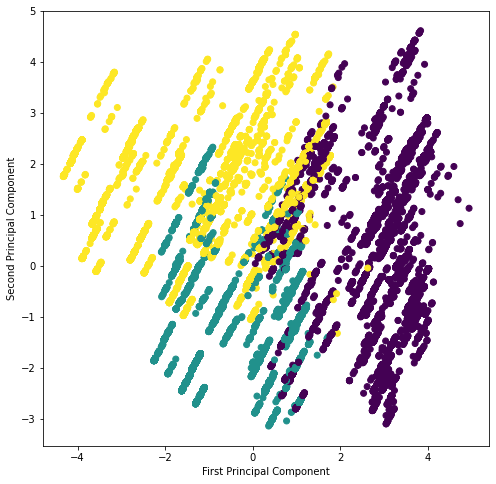

In [57]:
## Visualizing the data for 3 clusters

plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=data3['Cluster'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

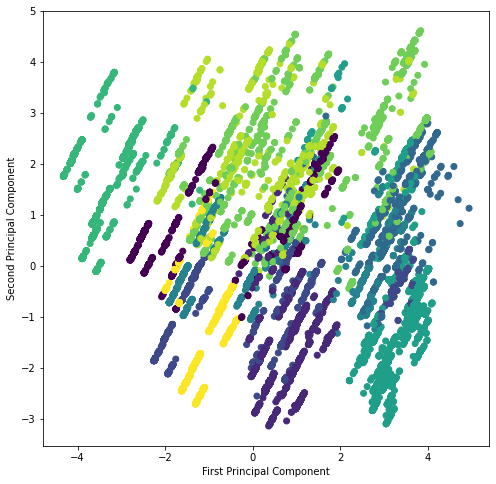

In [58]:
## Data Visualization for 5 clusters

plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=data5['Cluster'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

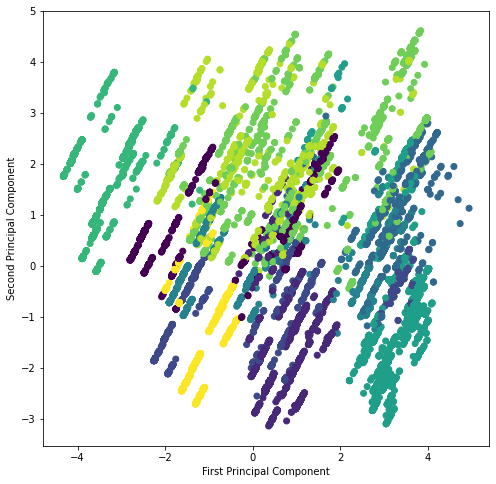

In [59]:
## Visualizing for 10 Clusters

plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=data10['Cluster'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### Analyzing the Three clusters 

In [61]:
df = data3
data3.head()

,index,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state,Cluster
0,0,Airtel,Indoor,4G,3,Satisfactory,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0,2
1,1,Vodafone,Indoor,4G,1,Call Dropped,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0,0
2,2,Airtel,Indoor,3G,1,Call Dropped,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0,0
3,3,Airtel,Indoor,4G,3,Satisfactory,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0,0
4,4,Airtel,Travelling,4G,3,Satisfactory,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0,1


In [62]:
print(df[df['Cluster'] == 0].shape)
df0 = df[df['Cluster'] == 0]

(9029, 16)


In [63]:
print(df[df['Cluster'] == 1].shape)
df1 = df[df['Cluster'] == 1]

(10975, 16)


In [64]:
print(df[df['Cluster'] == 2].shape)
df2 = df[df['Cluster'] == 2]

(10593, 16)


In [66]:
df0.head()

,index,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state,Cluster
1,1,Vodafone,Indoor,4G,1,Call Dropped,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0,0
2,2,Airtel,Indoor,3G,1,Call Dropped,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0,0
3,3,Airtel,Indoor,4G,3,Satisfactory,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0,0
11,11,Airtel,Travelling,3G,5,Satisfactory,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0,0
18,18,Airtel,Indoor,3G,1,Call Dropped,Maharashtra,1852.700,-82.35,549.04,-83.500,112374333.0,82.34,1455.5,307713.0,0


In [67]:
print(df0['Operator'].value_counts())
print("\n")
print(df0['In Out Travelling'].value_counts())
print("\n")
print(df0['Network Type'].value_counts())
print("\n")
print(df0['Rating'].value_counts())
print("\n")
print(df0['Call Drop Category'].value_counts())
print("\n")
print(df0['State Name'].value_counts())
print("\n---------------------------------------------------------------------------------------------\n")
print(df0['Average Data Speed Download'].agg([max, min]))
print("\n")
print(df0['Average Signal Strength Download'].agg([max, min]))
print("\n")
print(df0['Average Data Speed Upload'].agg([max, min]))
print("\n")
print(df0['Average Signal Strength Upload'].agg([max, min]))
print("\n")
print(df0['Population'].agg([max, min]))
print("\n")
print(df0['Literacy Rate'].agg([max, min]))
print("\n")
print(df0['Rainfall'].agg([max, min]))
print("\n")
print(df0['Area of the state'].agg([max, min]))
print("\n")

Vodafone    4646
Airtel      2947
Idea         964
BSNL         472
Name: Operator, dtype: int64


Indoor        6269
Travelling    1392
Outdoor       1368
Name: In Out Travelling, dtype: int64


3G    6564
4G    2465
Name: Network Type, dtype: int64


5    3512
1    2149
4    1607
3    1072
2     689
Name: Rating, dtype: int64


Satisfactory          5797
Poor Voice Quality    2112
Call Dropped          1120
Name: Call Drop Category, dtype: int64


Maharashtra       2668
Rajasthan         1644
Gujarat           1542
Uttar Pradesh     1017
Tamil Nadu         581
West Bengal        476
Karnataka          384
Haryana            297
Madhya Pradesh     242
Odisha              84
Andhra Pradesh      43
Bihar               33
Punjab              18
Name: State Name, dtype: int64

---------------------------------------------------------------------------------------------

max    7636.48
min       0.00
Name: Average Data Speed Download, dtype: float64


max     -63.0
min   -8407.0
Name: Aver

In [68]:
print(df1['Operator'].value_counts())
print("\n")
print(df1['In Out Travelling'].value_counts())
print("\n")
print(df1['Network Type'].value_counts())
print("\n")
print(df1['Rating'].value_counts())
print("\n")
print(df1['Call Drop Category'].value_counts())
print("\n")
print(df1['State Name'].value_counts())
print("\n---------------------------------------------------------------------------------------------\n")
print(df1['Average Data Speed Download'].agg([max, min]))
print("\n")
print(df1['Average Signal Strength Download'].agg([max, min]))
print("\n")
print(df1['Average Data Speed Upload'].agg([max, min]))
print("\n")
print(df1['Average Signal Strength Upload'].agg([max, min]))
print("\n")
print(df1['Population'].agg([max, min]))
print("\n")
print(df1['Literacy Rate'].agg([max, min]))
print("\n")
print(df1['Rainfall'].agg([max, min]))
print("\n")
print(df1['Area of the state'].agg([max, min]))
print("\n")

RJio        7598
Airtel      2031
Idea         838
Vodafone     466
BSNL          42
Name: Operator, dtype: int64


Indoor        6185
Outdoor       2679
Travelling    2111
Name: In Out Travelling, dtype: int64


4G    10975
Name: Network Type, dtype: int64


4    4307
5    2627
3    1699
1    1620
2     722
Name: Rating, dtype: int64


Satisfactory          8223
Poor Voice Quality    2105
Call Dropped           647
Name: Call Drop Category, dtype: int64


Maharashtra       7754
Uttar Pradesh     1514
Madhya Pradesh     630
Rajasthan          520
Gujarat            313
Karnataka          244
Name: State Name, dtype: int64

---------------------------------------------------------------------------------------------

max    27784.86
min     4772.38
Name: Average Data Speed Download, dtype: float64


max   -81.035
min   -96.882
Name: Average Signal Strength Download, dtype: float64


max    7683.47
min    2591.08
Name: Average Data Speed Upload, dtype: float64


max   -81.124
min   -96.6

In [70]:
print(df2['Operator'].value_counts())
print("\n")
print(df2['In Out Travelling'].value_counts())
print("\n")
print(df2['Network Type'].value_counts())
print("\n")
print(df2['Rating'].value_counts())
print("\n")
print(df2['Call Drop Category'].value_counts())
print("\n")
print(df2['State Name'].value_counts())
print("\n---------------------------------------------------------------------------------------------\n")
print(df2['Average Data Speed Download'].agg([max, min]))
print("\n")
print(df2['Average Signal Strength Download'].agg([max, min]))
print("\n")
print(df2['Average Data Speed Upload'].agg([max, min]))
print("\n")
print(df2['Average Signal Strength Upload'].agg([max, min]))
print("\n")
print(df2['Population'].agg([max, min]))
print("\n")
print(df2['Literacy Rate'].agg([max, min]))
print("\n")
print(df2['Rainfall'].agg([max, min]))
print("\n")
print(df2['Area of the state'].agg([max, min]))
print("\n")

RJio        7567
Airtel      1993
Vodafone     783
Idea         248
BSNL           2
Name: Operator, dtype: int64


Indoor        7676
Outdoor       1901
Travelling    1016
Name: In Out Travelling, dtype: int64


4G    10589
3G        4
Name: Network Type, dtype: int64


5    4913
1    1637
3    1566
4    1459
2    1018
Name: Rating, dtype: int64


Satisfactory          7223
Poor Voice Quality    2319
Call Dropped          1051
Name: Call Drop Category, dtype: int64


West Bengal       1908
Tamil Nadu        1587
Odisha            1562
Bihar             1371
Karnataka         1339
Haryana           1007
Gujarat            816
Andhra Pradesh     766
Punjab             237
Name: State Name, dtype: int64

---------------------------------------------------------------------------------------------

max    32444.0696
min      611.1600
Name: Average Data Speed Download, dtype: float64


max   -65.324
min   -98.930
Name: Average Signal Strength Download, dtype: float64


max    9720.68
min  